In [2]:
%run -i classes_lkl_prof_functions.ipynb

In [3]:
test = lkl_prof('/Users/tanvikarwal/Desktop/Early_dark_energy/likelihood_profile/lkl_prof_code/lcdm_tests_output/', 'lcdm_cmb_bao_sne_', 'H0')

test.prof_incr = 0.1
test.prof_max = 73.5
test.prof_min = 63.
test.processes = 2

In [4]:
test.mcmc()

Chains converged sufficiently. Current R-1 = 0.030 satisfies R-1 wanted = 0.050. 
Move on to checking minimum.


True

In [6]:
test.global_min();

check_global_min: Found previously run MCMC chains and global minimizer. 
match_param_names: Found existing file with correct name and parameters / parameter sequence. Will append to it. 
/Users/tanvikarwal/Desktop/Early_dark_energy/likelihood_profile/lkl_prof_code/lcdm_tests_output/lcdm_cmb_bao_sne__p_lkl_profile.txt


In [7]:
test.init_lkl_prof();

In [11]:
test.run_lkl_prof()

74.03770587

## Analysis functions 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
chis = test.sum_params(['chi2__CMB', 'chi2__SN', 'chi2__BAO'])
lkl_prof_param = test.full_lkl_prof_dict()[test.prof_param]

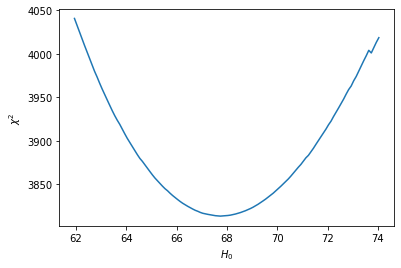

In [16]:
plt.plot( lkl_prof_param , chis )
plt.ylabel(r'$\chi^2$')
plt.xlabel(r'$H_0$')
plt.show()

#### Comparision to $\chi^2$ directly from MCMC chains

In [51]:
H0 = test.mcmc_chains.getParams().H0

H0_mcmc = []
chis_mcmc = []

for h in lkl_prof_param:
    np.where( np.abs(H0-h)<0.01 ) 
    try:
        mcmc_chi = min(test.mcmc_chains.getParams().chi2__CMB[np.where( np.abs(H0-h)<0.01 )] \
                + test.mcmc_chains.getParams().chi2__SN[np.where( np.abs(H0-h)<0.01 )] \
                + test.mcmc_chains.getParams().chi2__BAO[np.where( np.abs(H0-h)<0.01 )])
        H0_mcmc.append(h)
        chis_mcmc.append(mcmc_chi)
    except ValueError:
        pass

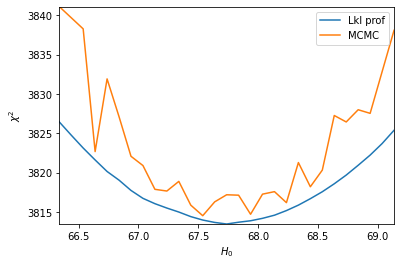

In [57]:
plt.plot( lkl_prof_param , chis , label='Lkl prof')
plt.plot( H0_mcmc , chis_mcmc , label='MCMC')
plt.ylabel(r'$\chi^2$')
plt.xlabel(r'$H_0$')
plt.xlim([min(H0_mcmc), max(H0_mcmc)])
plt.ylim([min(chis), max(chis_mcmc)])
plt.legend()
plt.show()

For the plot above, I looked for MCMC points within $\pm 0.01$ of the lkl prof $H_0$ values. From all these points, I got the minimum $\chi^2$ and have plotted that here. 

This makes the MCMC points look pretty bad relative to the lkl profile. But we are narrowing our search substantially. Let's try just looking at the best $\chi^2$ in a more rough vicinity of the desired $H_0$ below.

Here, set the `tolerance` to set what range near the $H_0$'s of the lkl profile should we look for MCMC $H_0$'s to compare minimum $\chi^2$'s to. 

In [88]:
H0 = test.mcmc_chains.getParams().H0

H0_mcmc = []
chis_mcmc = []

tolerance = 0.1

for h in lkl_prof_param:
    h_matches = np.where( np.abs(H0-h)<tolerance) 
    try:
        min_chi = min(test.mcmc_chains.getParams().chi2__CMB[h_matches[0]] \
                        + test.mcmc_chains.getParams().chi2__SN[h_matches[0]] \
                        + test.mcmc_chains.getParams().chi2__BAO[h_matches[0]])
        index_min = h_matches[0][0]
        for i in h_matches:
            mcmc_chi = min(test.mcmc_chains.getParams().chi2__CMB[h_matches] \
                    + test.mcmc_chains.getParams().chi2__SN[h_matches] \
                    + test.mcmc_chains.getParams().chi2__BAO[h_matches])
            if mcmc_chi < min_chi:
                min_chi = mcmc_chi
                index_min = i
            
        H0_mcmc.append(H0[index_min])
        chis_mcmc.append(min_chi)
    except ValueError:
        pass

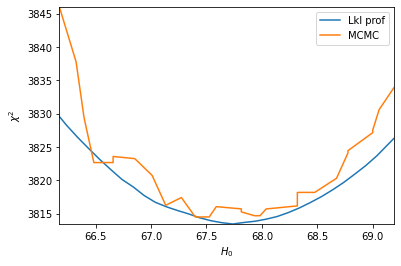

In [89]:
plt.plot( lkl_prof_param , chis , label='Lkl prof')
plt.plot( H0_mcmc , chis_mcmc , label='MCMC')
plt.ylabel(r'$\chi^2$')
plt.xlabel(r'$H_0$')
plt.xlim([min(H0_mcmc), max(H0_mcmc)])
plt.ylim([min(chis), max(chis_mcmc)])
plt.legend()
plt.show()

#### All parameters

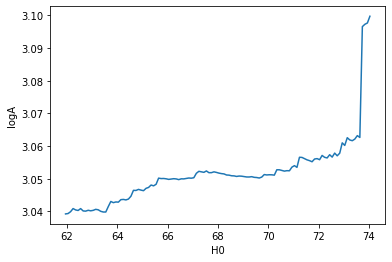

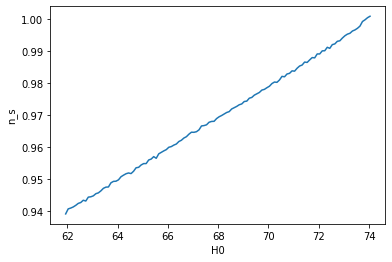

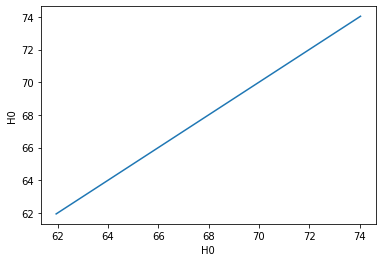

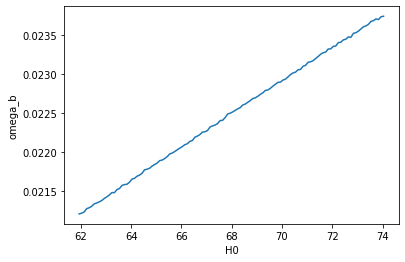

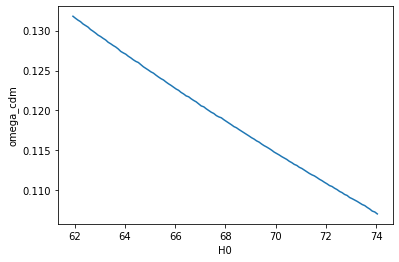

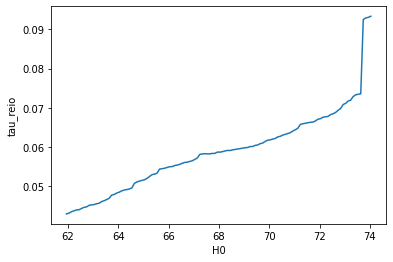

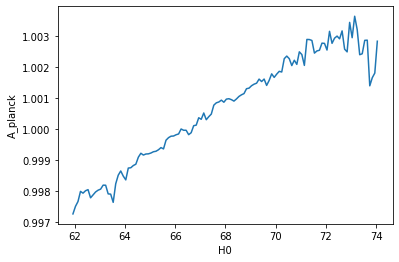

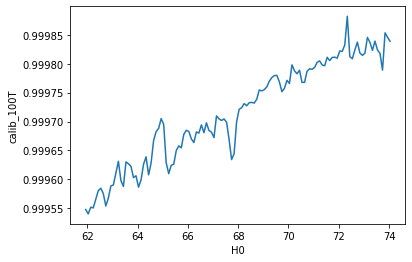

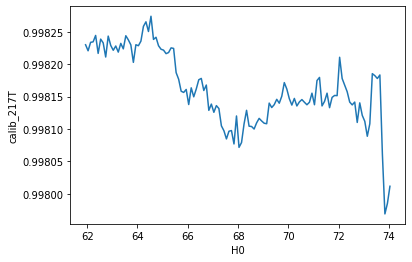

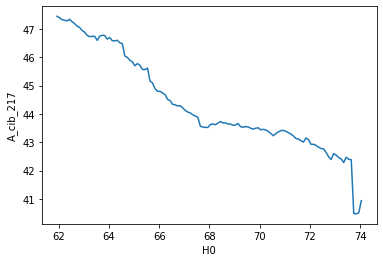

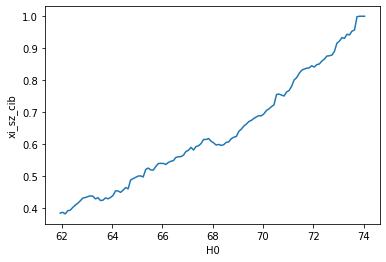

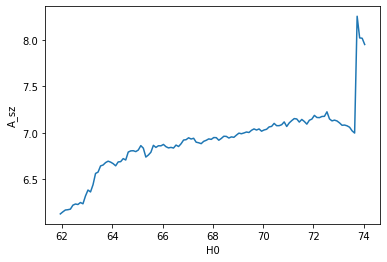

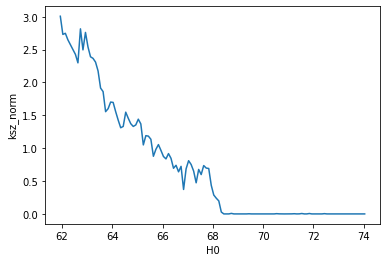

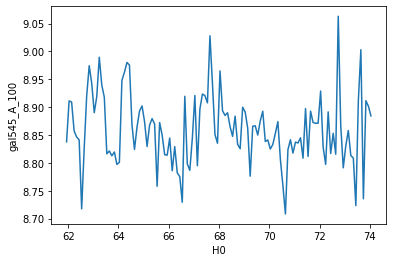

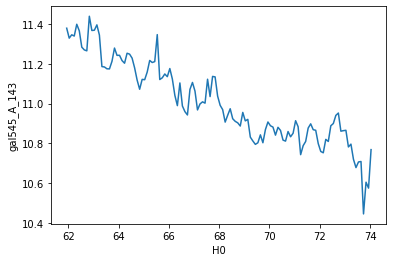

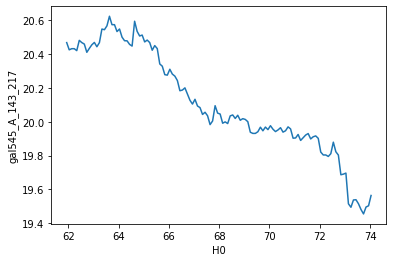

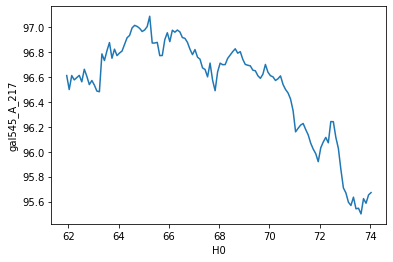

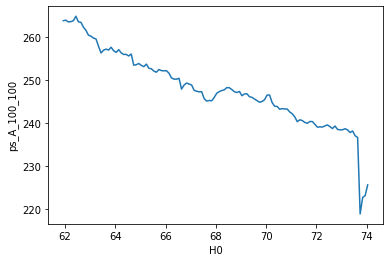

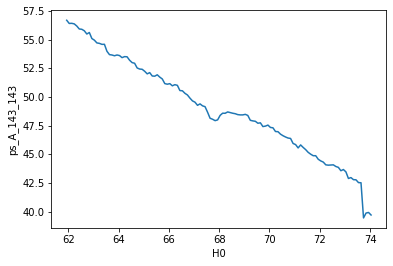

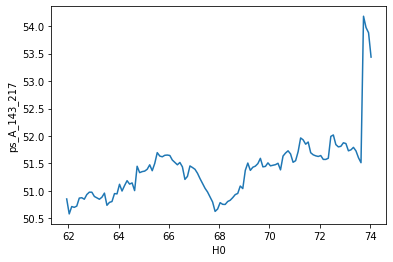

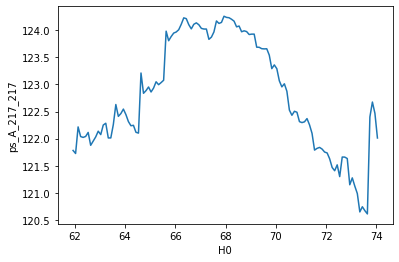

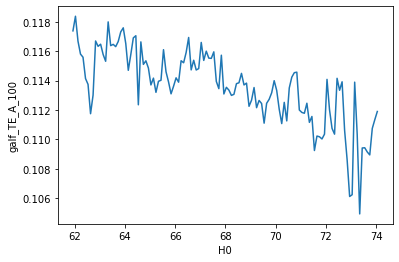

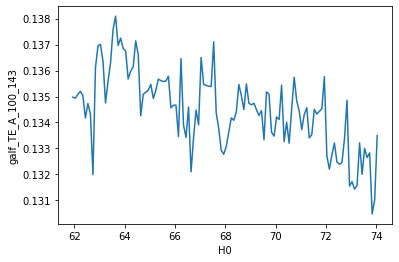

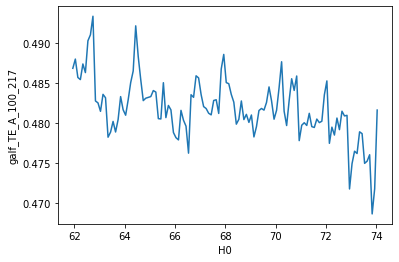

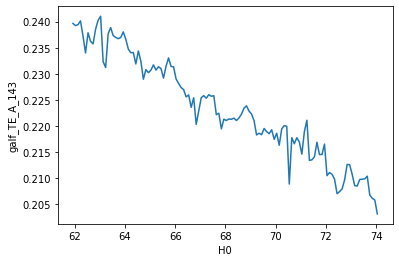

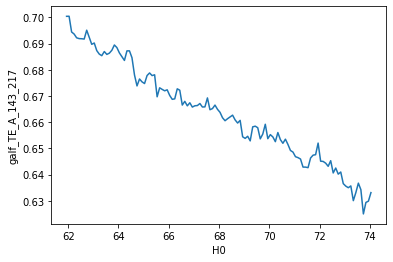

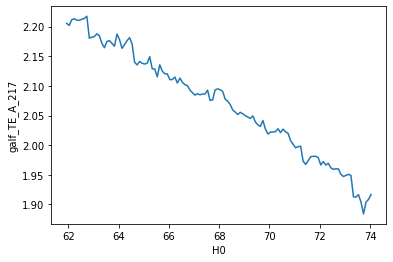

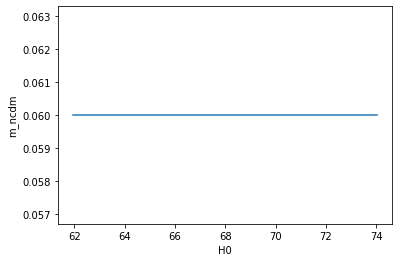

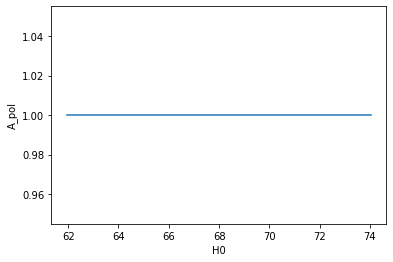

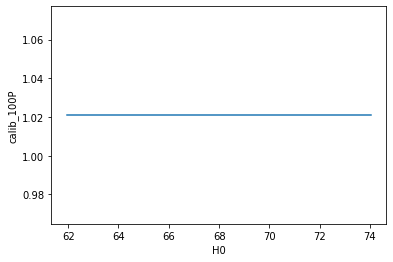

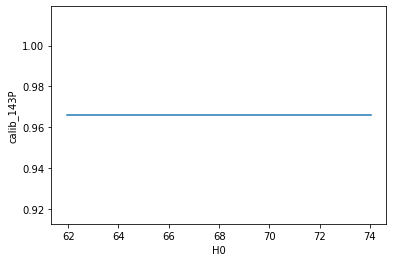

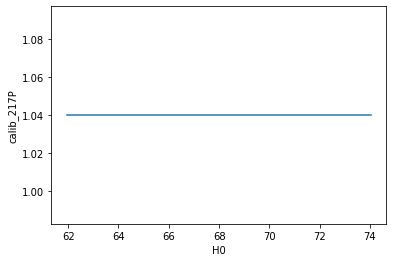

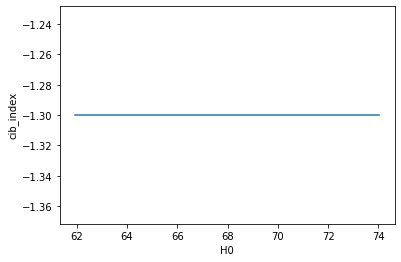

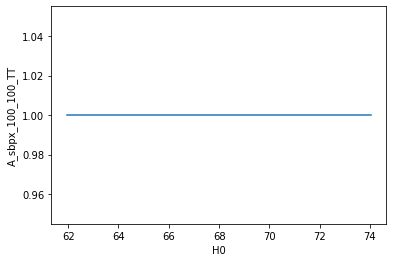

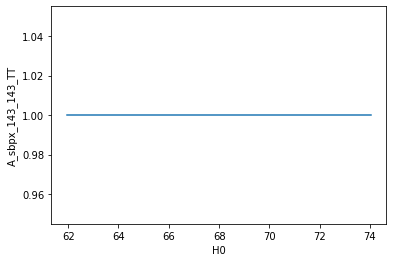

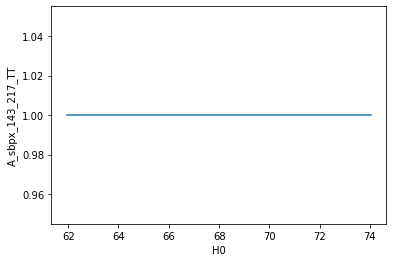

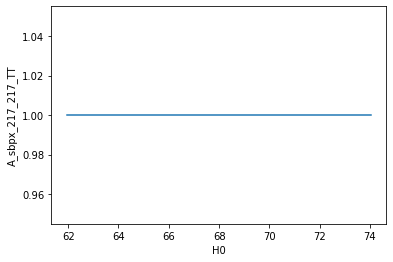

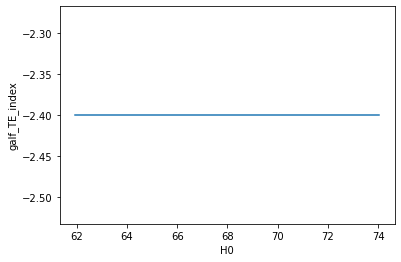

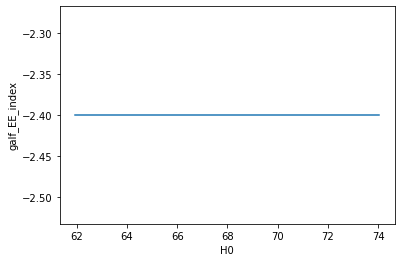

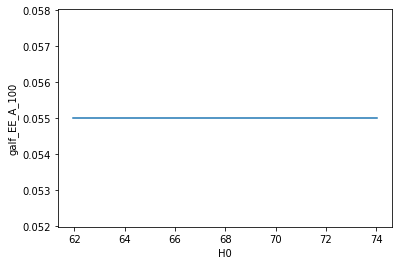

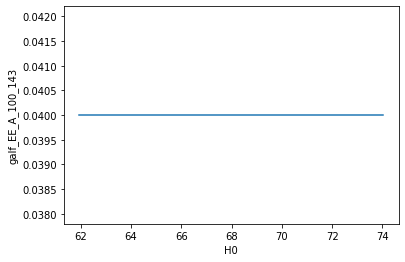

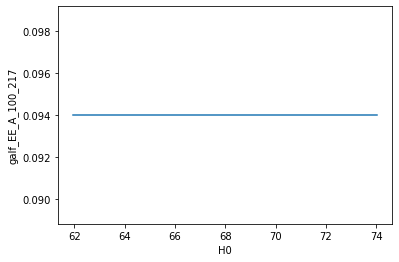

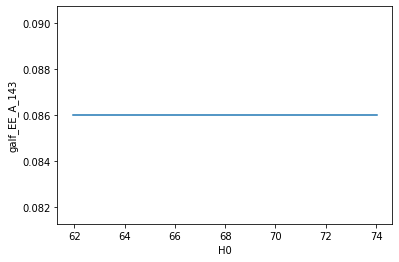

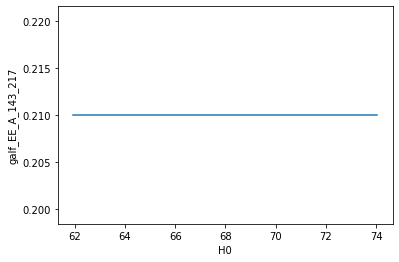

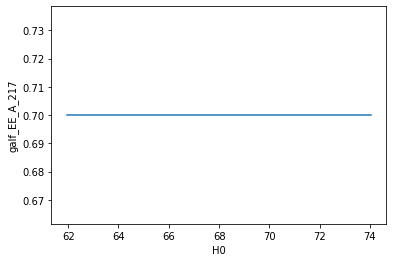

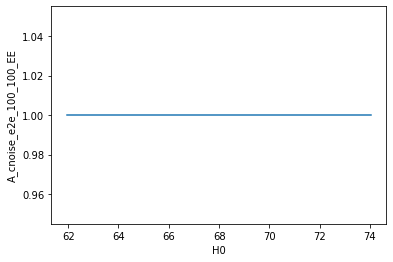

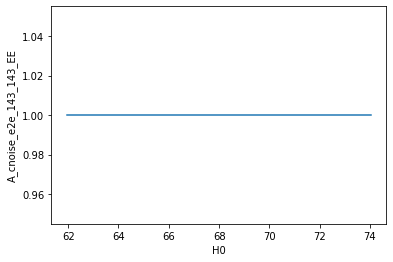

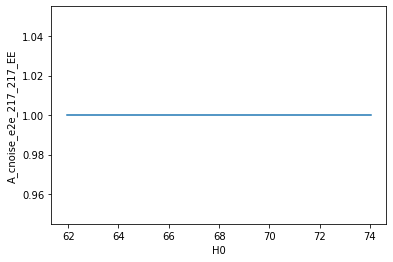

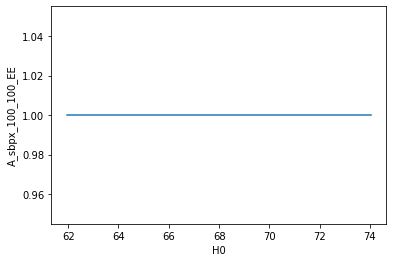

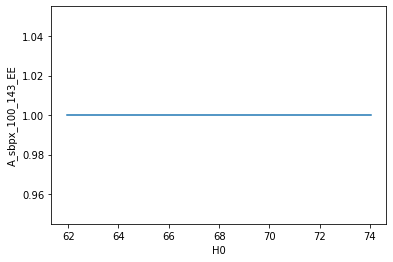

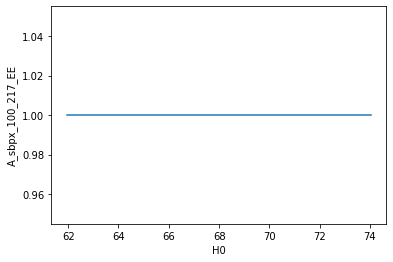

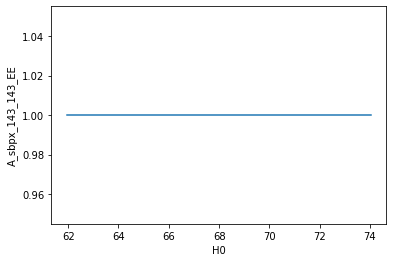

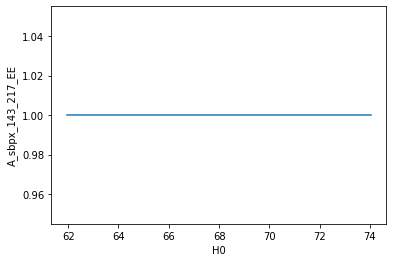

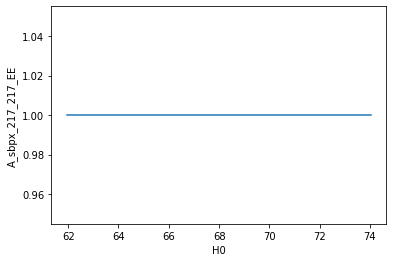

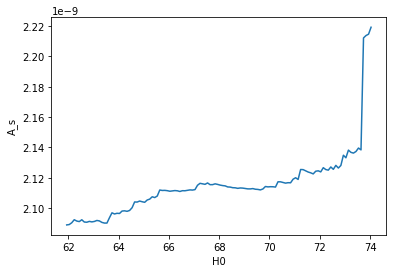

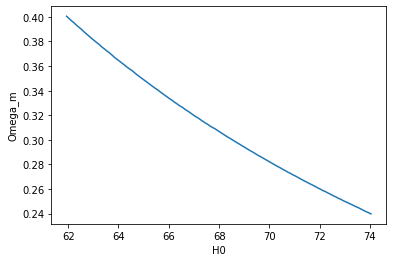

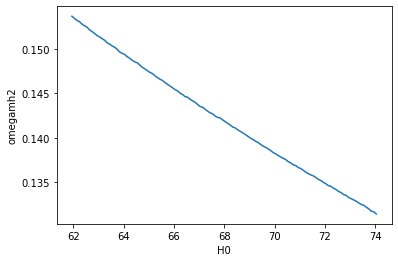

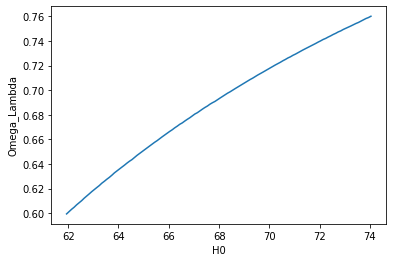

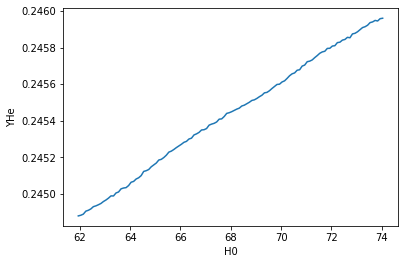

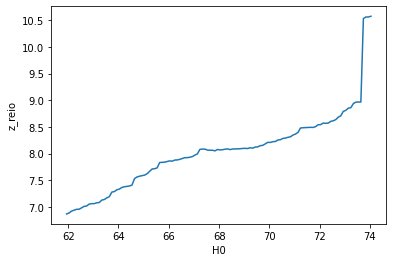

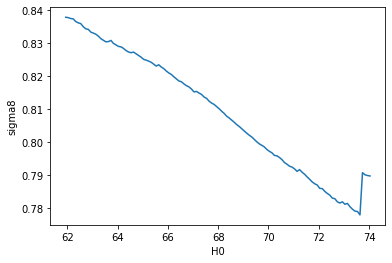

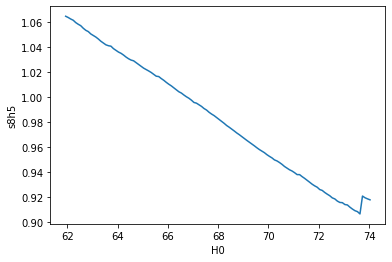

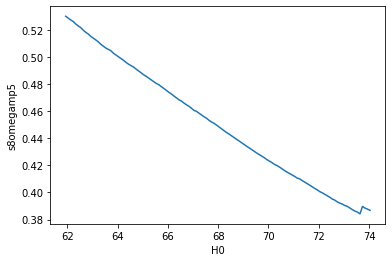

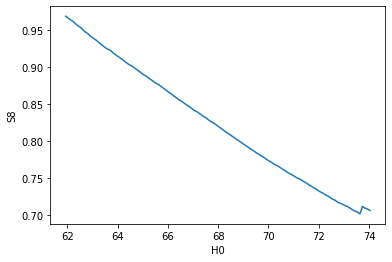

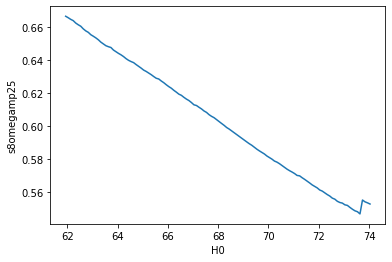

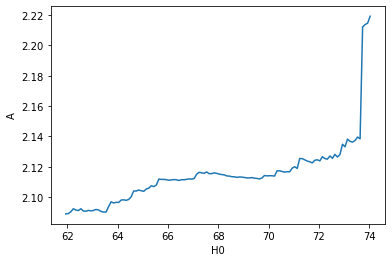

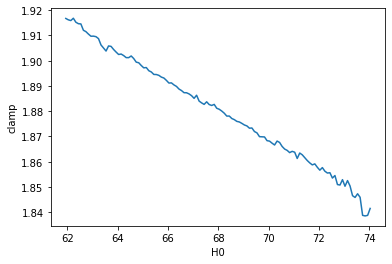

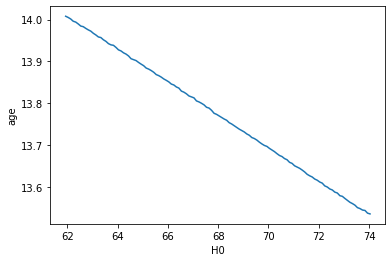

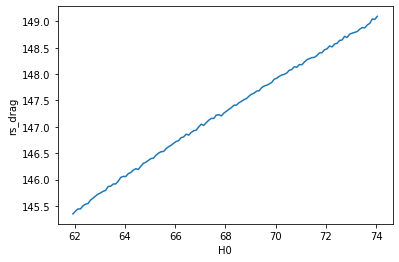

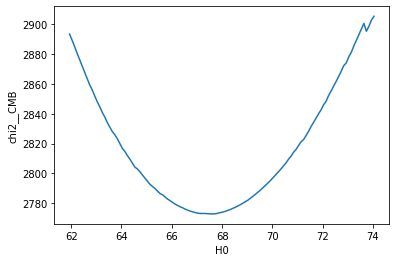

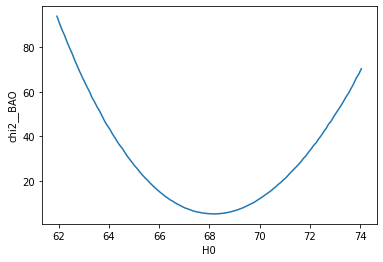

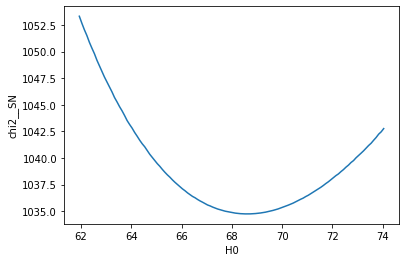

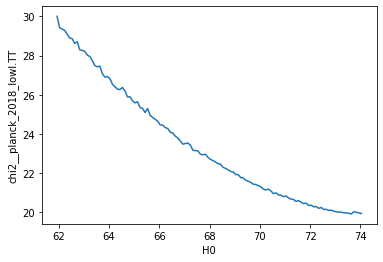

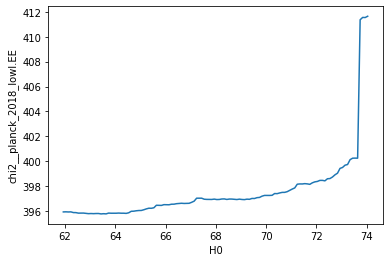

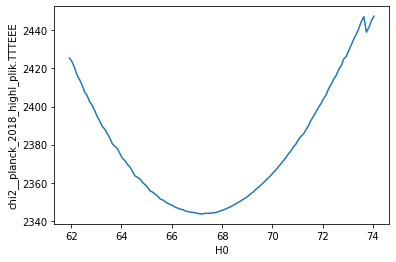

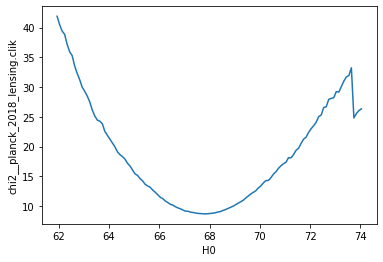

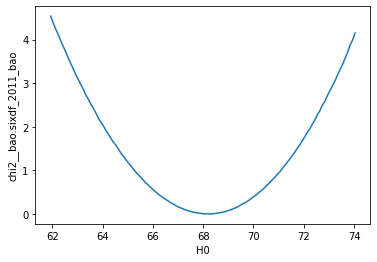

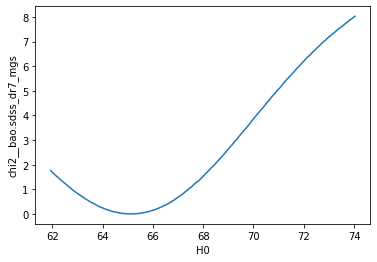

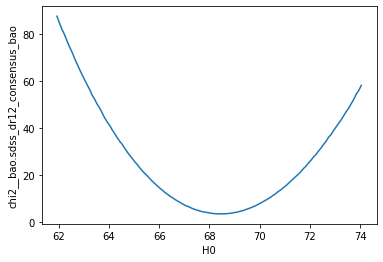

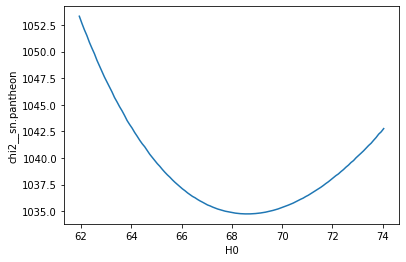

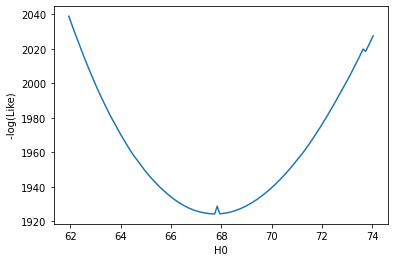

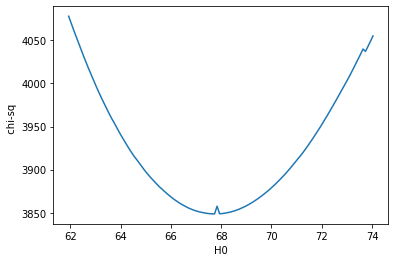

In [31]:
prof_lkl_output = test.full_lkl_prof_dict()

for param in test.param_order:
    plt.plot( prof_lkl_output[test.prof_param], prof_lkl_output[param] )
    # try:
    #     plt.ylabel(r'$'+lkl_pro_yaml['params'][param]['latex']+'$')
    # except KeyError:
    #     plt.ylabel([param])
    # plt.xlabel(r'$'+lkl_pro_yaml['params'][test.prof_param]['latex']+'$')
    plt.ylabel(param)
    plt.xlabel(test.prof_param)
    plt.show()